In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Exploratory Data Analysis

First we make a data frame of the dataset. The head function is run to check that we have correctly loaded the data into the dataframe.

In [2]:
train_df = pd.read_csv('train_small.csv', header=None)
test_df = pd.read_csv('test_small.csv')
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,200,201
0,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
1,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
2,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
3,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
4,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097


It looks like we successfully loaded the data.

To get a better idea of the data, we run the describe function to look at the data's distibution.

In [3]:
train_df.describe() 

,1,2,3,4,5,6,7,8,9,10,...,192,193,194,195,196,197,198,199,200,201
count,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,...,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000
mean,0.099733,10.678757,-1.625370,10.718501,6.801363,11.080280,-5.099666,5.412131,16.557562,0.284365,...,3.257023,7.444208,1.927193,3.328773,18.008622,-0.140578,2.298631,8.906114,15.869843,-3.323176
std,0.299646,3.037911,4.060012,2.629766,2.043351,1.627265,7.887190,0.867160,3.422813,3.335973,...,4.540336,3.018182,1.481911,3.988392,3.138089,1.427751,5.460012,0.920043,3.014017,10.438217
min,0.000000,0.597900,-15.043400,2.615000,-0.040200,5.490200,-29.777300,2.347300,5.349700,-9.905100,...,-13.999500,-2.009400,-3.566800,-11.783400,9.594900,-4.644200,-14.020400,5.960600,6.299300,-38.852800
25%,0.000000,8.461000,-4.751700,8.742600,5.252000,9.877400,-11.271800,4.768100,13.951300,-2.335100,...,-0.022800,5.161900,0.886300,0.587800,15.640500,-1.164000,-1.956100,8.253600,13.819700,-11.236200
50%,0.000000,10.526500,-1.614100,10.589100,6.837700,11.113000,-4.844100,5.387400,16.464600,0.409100,...,3.231400,7.341700,1.899100,3.387100,17.975900,-0.169000,2.390700,8.886000,15.931700,-2.800100
75%,0.000000,12.749600,1.371600,12.505900,8.333400,12.268000,0.907600,6.005500,19.119800,2.946300,...,6.410200,9.529300,2.952300,6.206400,20.421000,0.828300,6.573400,9.589400,18.071500,4.855300
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,16.806500,8.447700,27.638900,9.482200,...,18.342300,16.684600,7.611600,17.908600,27.928800,4.075600,16.226600,11.843900,26.079100,27.531900


The data shows that the mean target value is 0.099733. This means that there are more samples of customers that didn't make a transaction than not. With an imbalanced data set, we have to take steps to handle this.

## Quality of the dataset

Now we will look for issues within the data set, principally missing values and duplicate rows indicating. This is assess the quality of the data.

In [4]:
def missingData(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [5]:
missingData(train_df)

,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,200,201
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Types,object,int64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [6]:
# Checking the data for duplicates
duplicates = print(train_df.duplicated(subset=[i for i in range(2,train_df.shape[1])]))

print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
70052    False
70053    False
70054    False
70055    False
70056    False
Length: 70057, dtype: bool
None


#### There are no duplicate samples or missing values in the data set. There is no need to impute anything.

## Individual feature exploration
Without any information on the features and the apparently anonymized data, it is hard to interpret them but we can try to find some irregularities.

mean


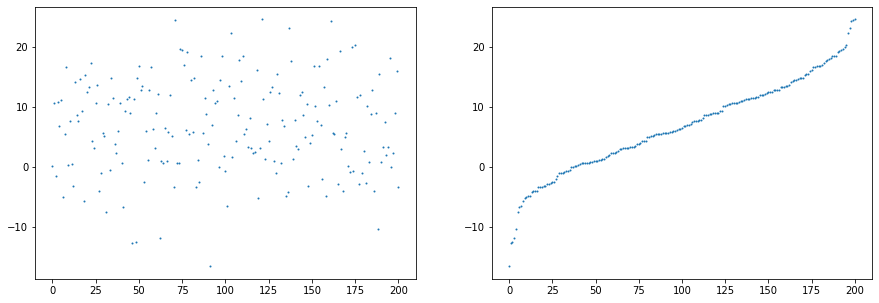

std


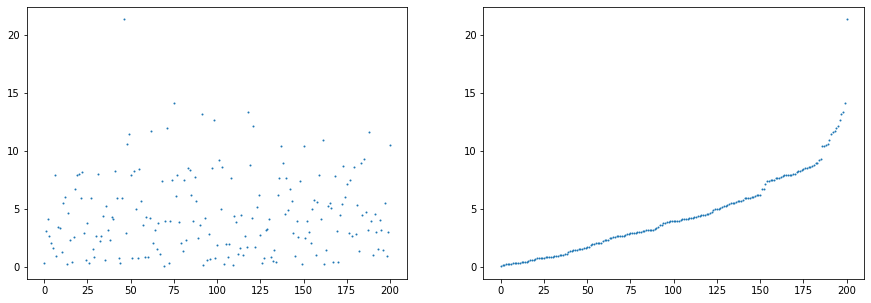

min


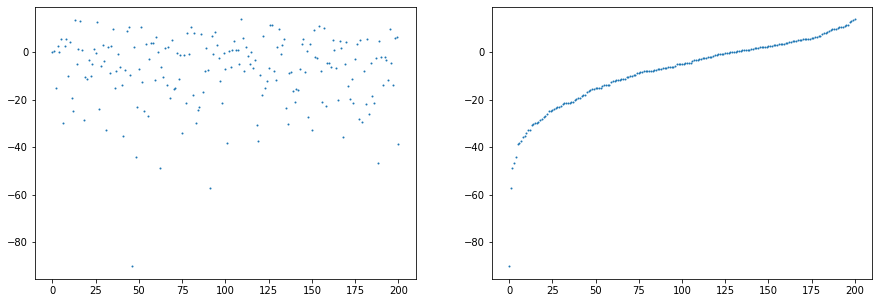

25%


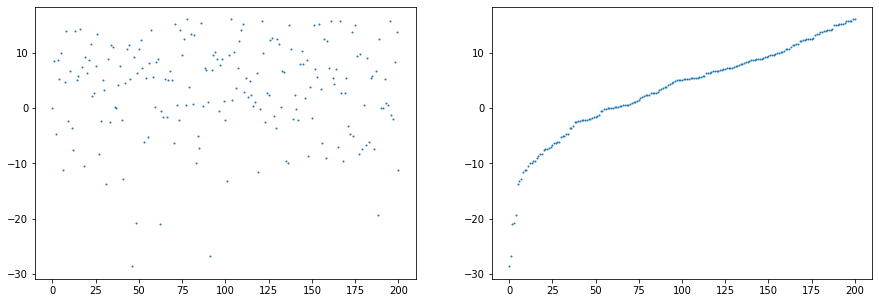

50%


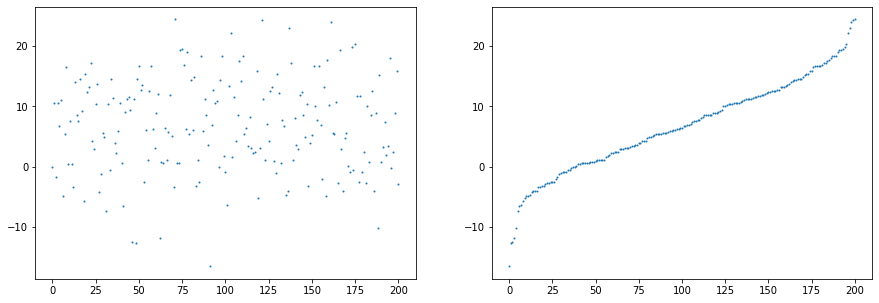

75%


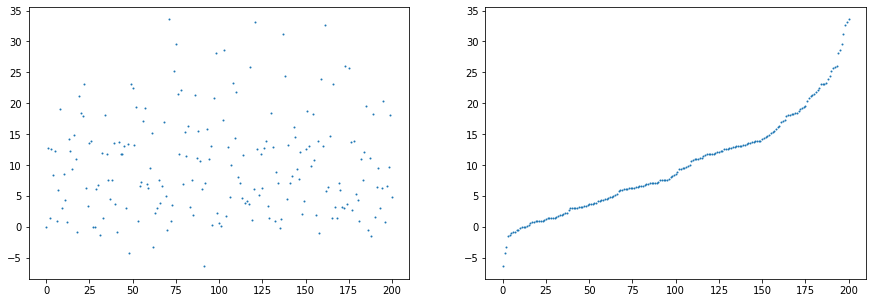

max


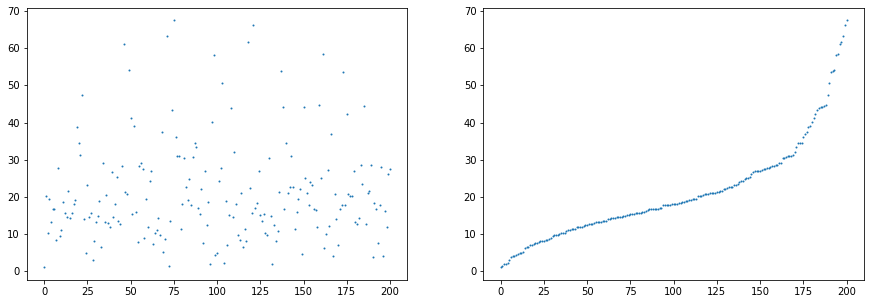

In [7]:
#Usual metrics for all features
description = train_df.describe()
for j in range(1, description.shape[0]):
    plt.figure(1, figsize=(15,5))
    print(description.index.values[j])
    col = description.take([j])
    ax = plt.subplot(121)
    plt.plot([i for i in range(description.shape[1])], description.take([j]).transpose(), 'o', markersize=1)
    ax = plt.subplot(122)
    plt.plot([i for i in range(description.shape[1])], np.sort(description.take([j]).unstack().transpose()), 'o', markersize=1)
    plt.show()

The usual metrics do not seem to show any anormal value, nor any groups of features with close values. Let's see the features in more details :

2


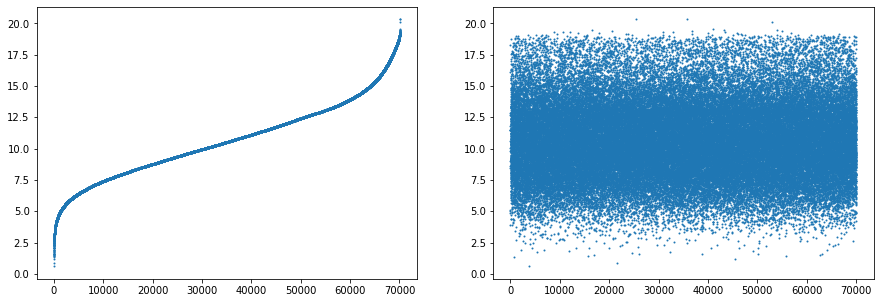

3


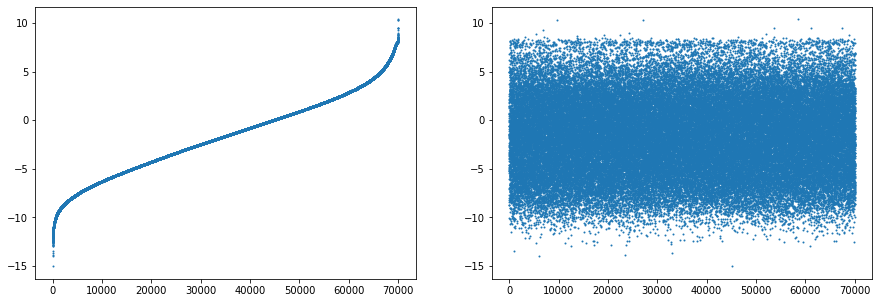

4


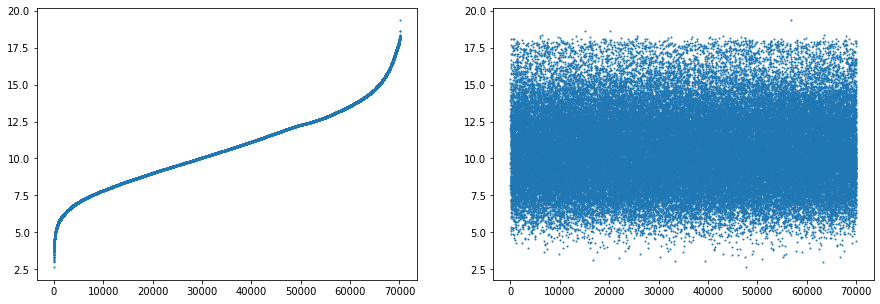

5


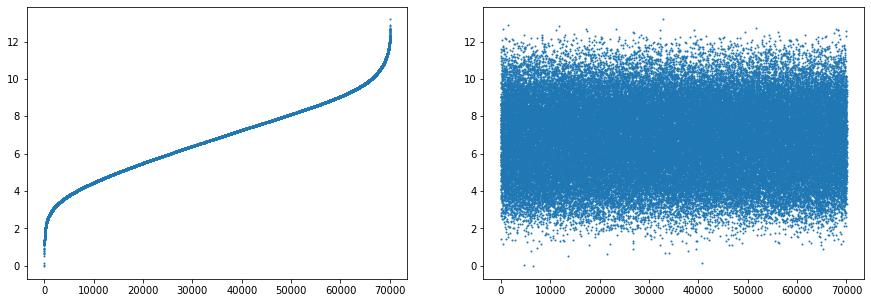

6


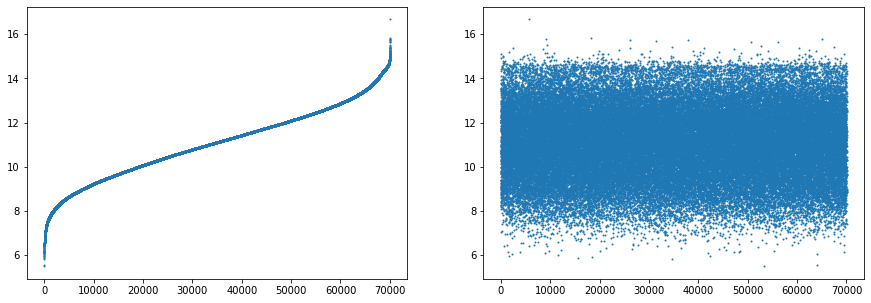

7


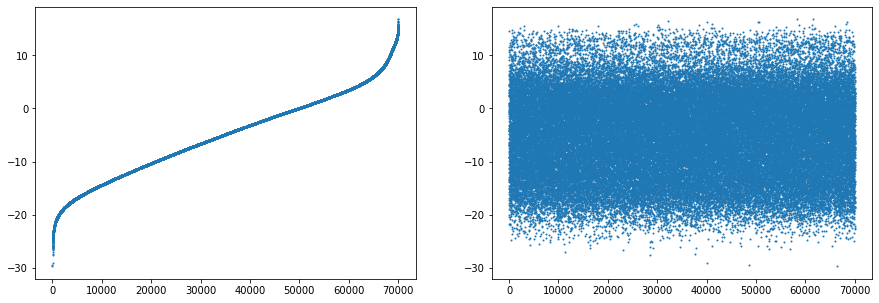

8


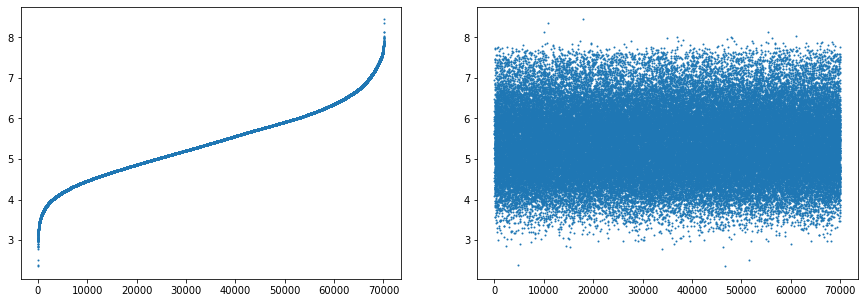

9


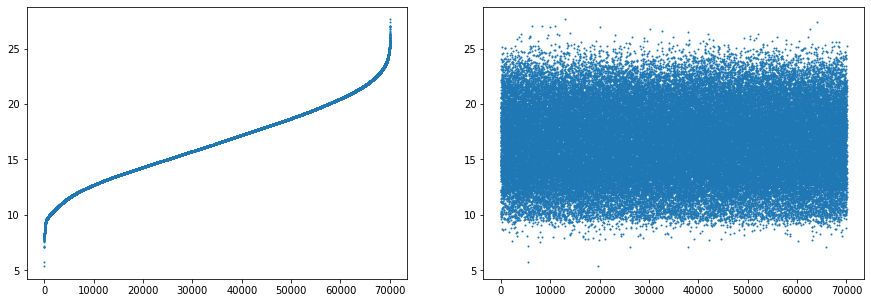

10


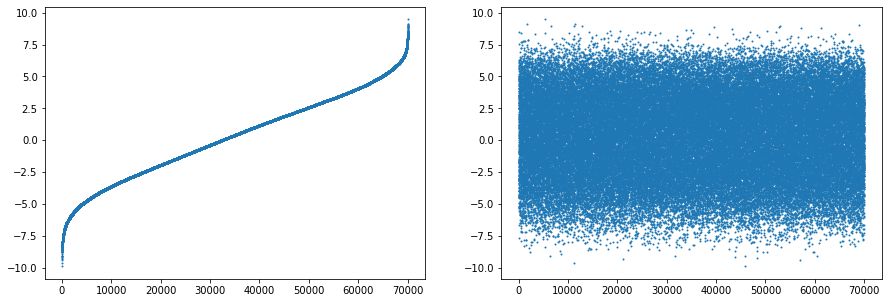

11


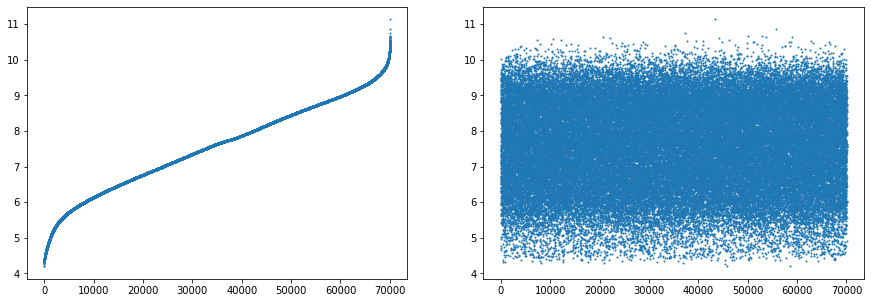

12


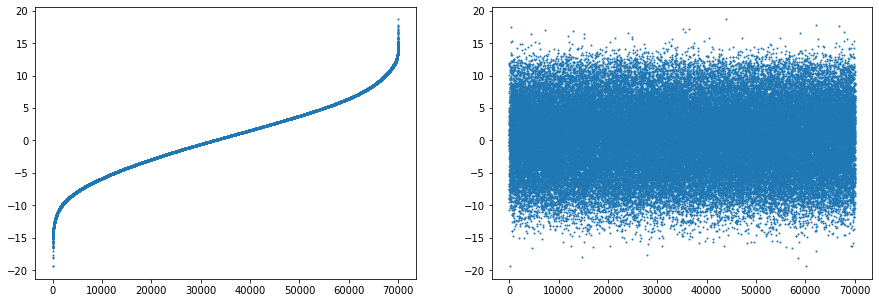

13


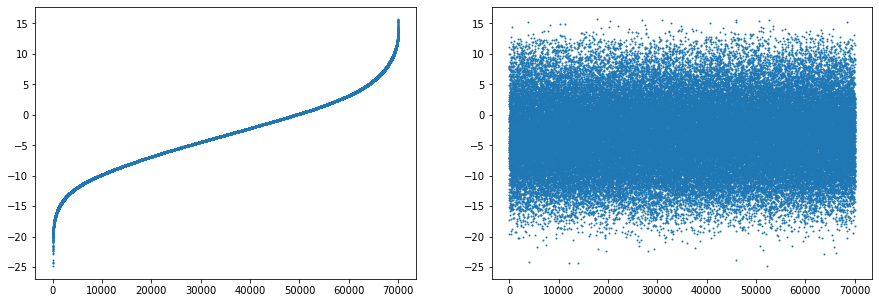

14


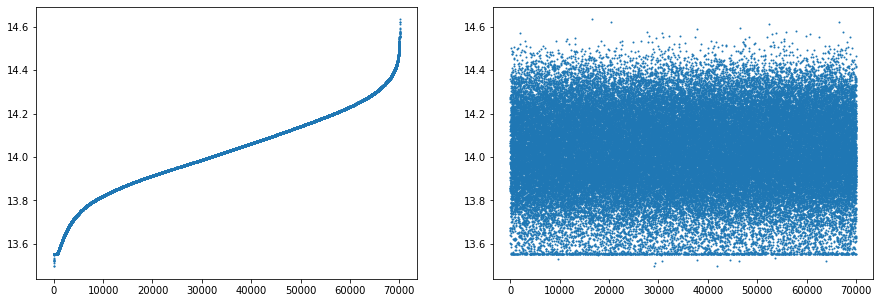

15


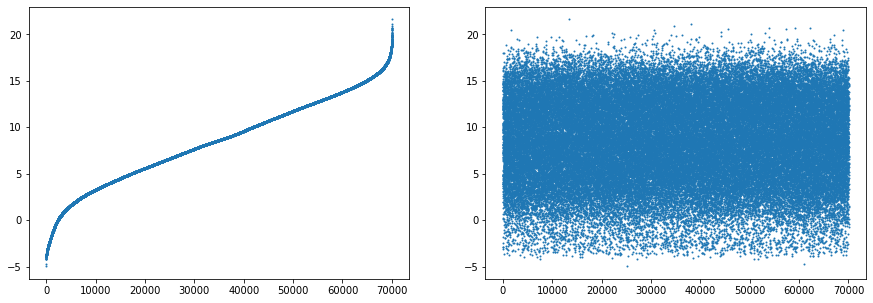

16


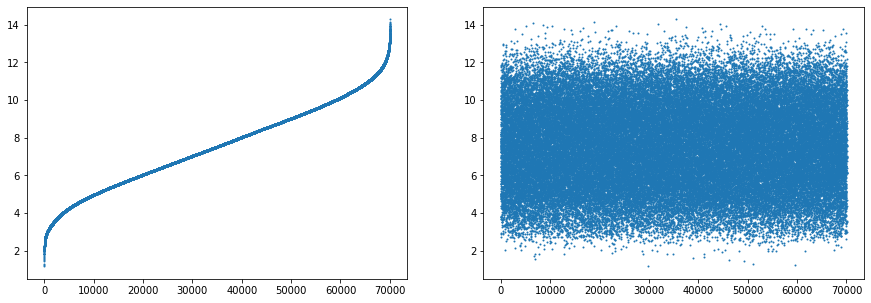

17


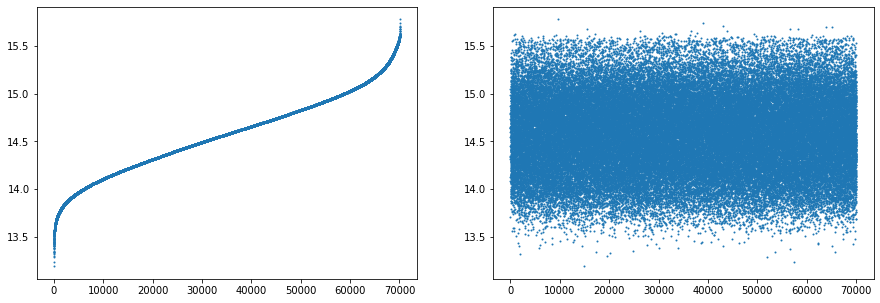

18


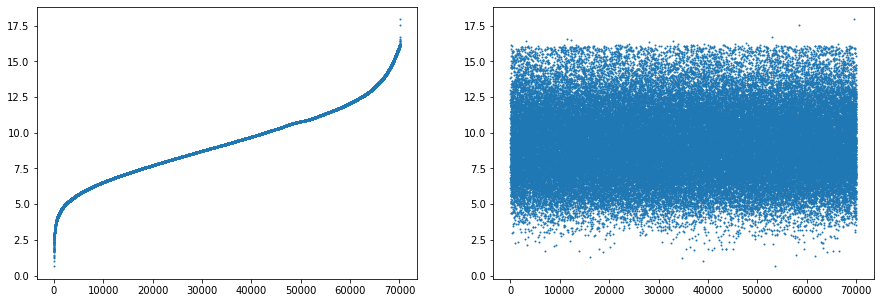

19


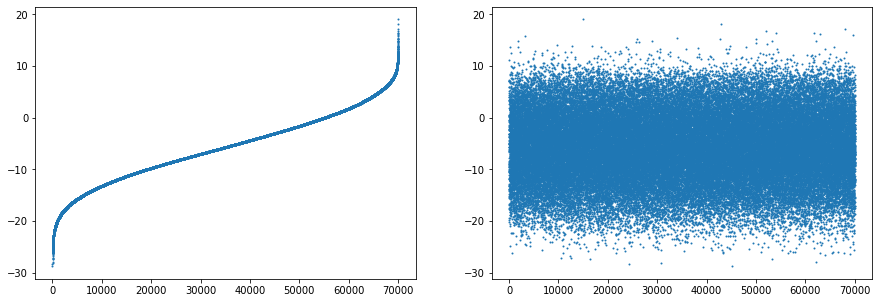

20


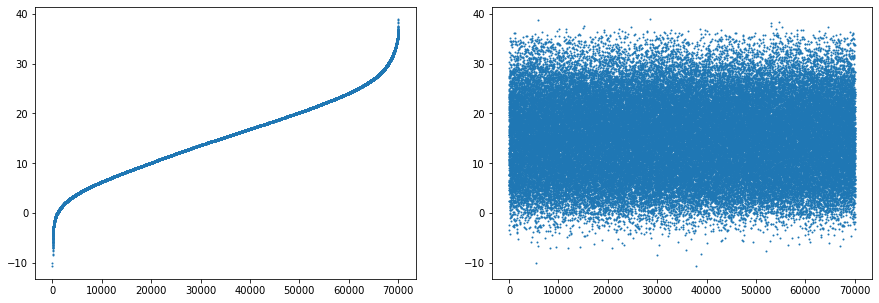

21


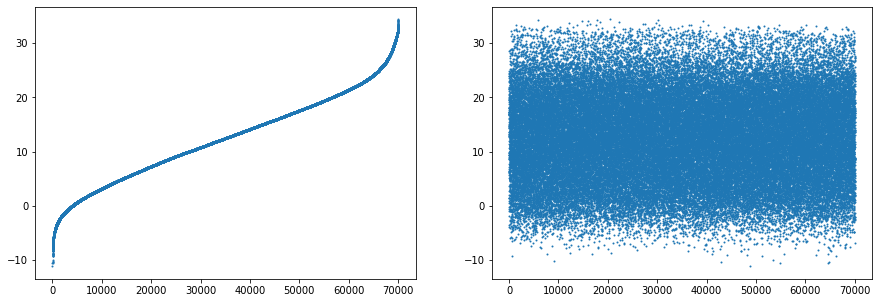

In [8]:
for j in range(2, 22):
    col = train_df.get(j)
    plt.figure(1, figsize=(15,5))
    print(j)
    ax = plt.subplot(121)
    ax.plot([i for i in range(col.size)], col.sort_values(), 'o', markersize=1)
    ax = plt.subplot(122)
    ax.plot([i for i in range(col.size)], col, 'o', markersize=1)
    plt.show()

Plotting each feature (by groups of 20 to not overwhelm my memory), I extracted those who look the most irregular and drawed a precise histogram for each one, with the testing set on top of the training set :

14


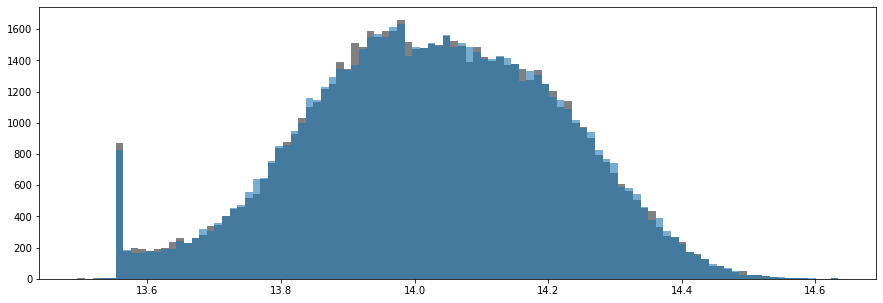

103


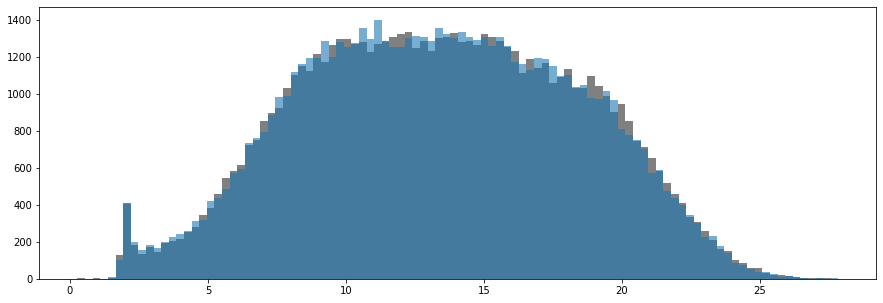

128


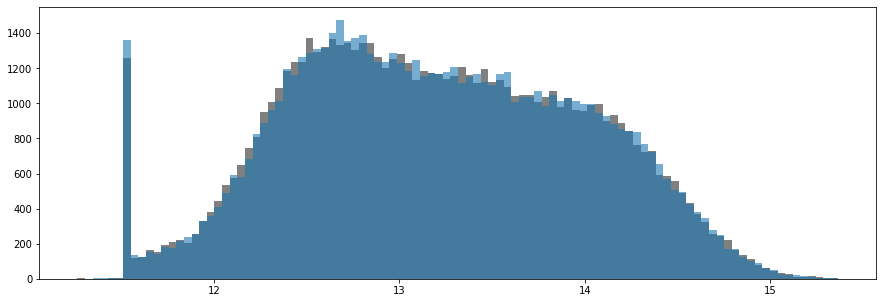

136


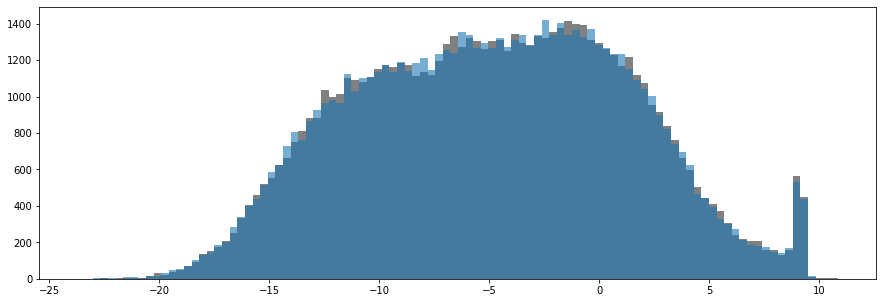

152


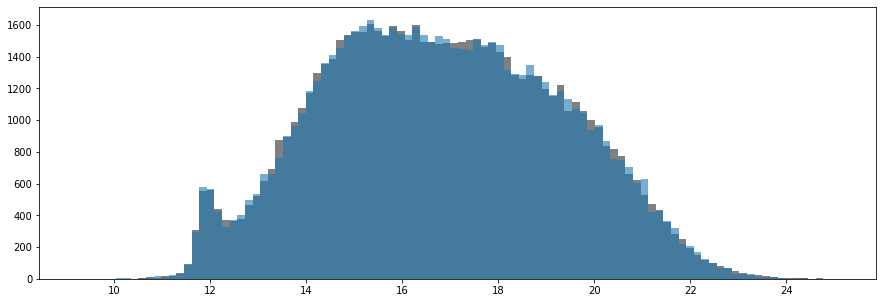

155


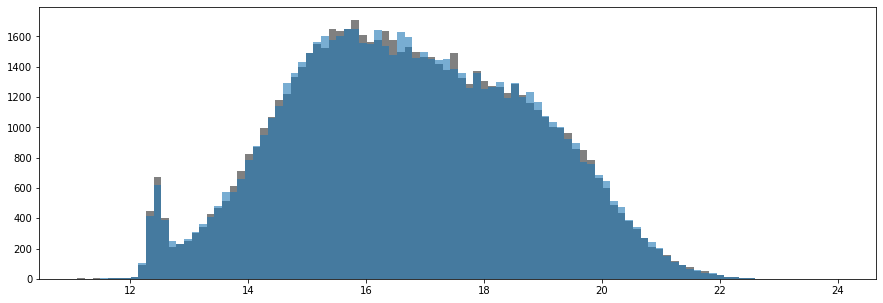

160


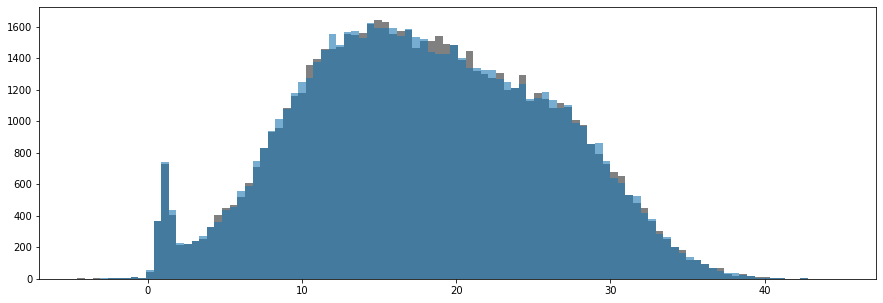

166


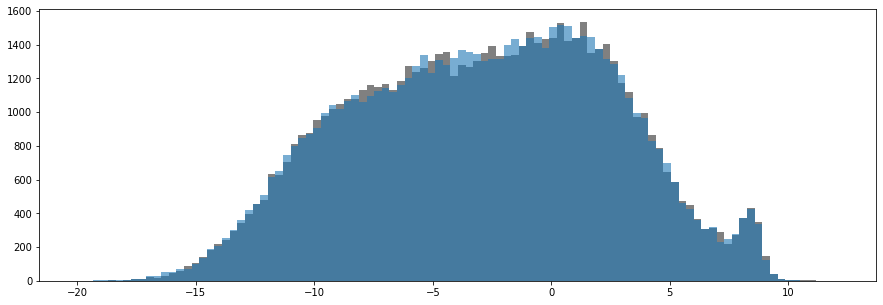

177


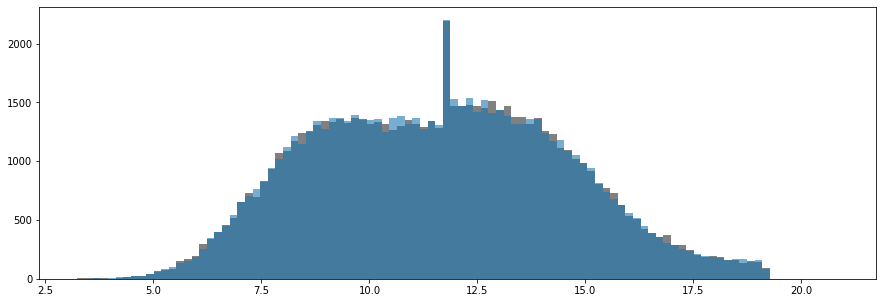

179


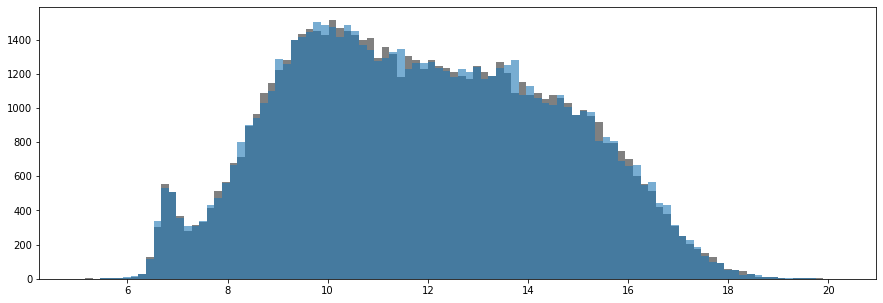

182


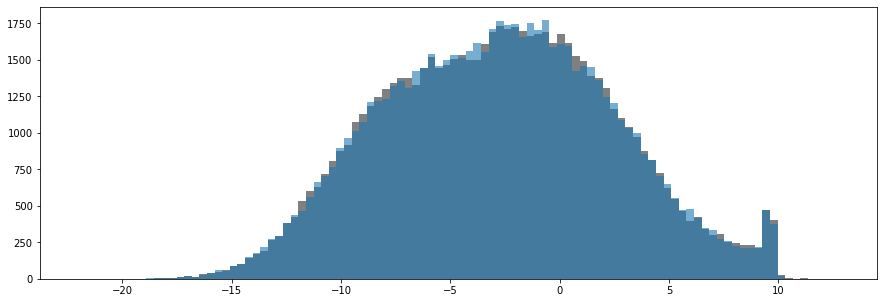

198


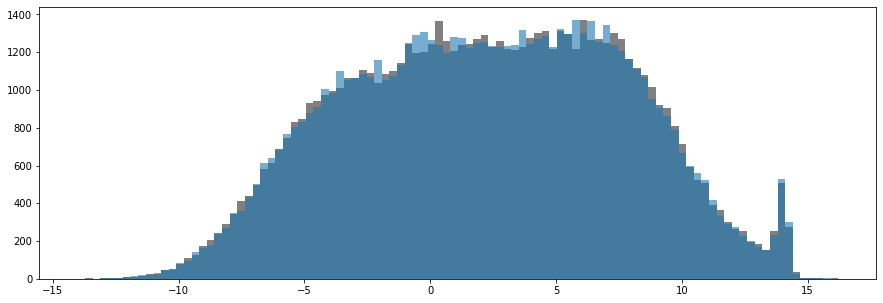

In [9]:
irregulars = [14, 103, 128, 136, 152, 155, 160, 166, 177, 179, 182, 198]
for j in irregulars:
    plt.figure(1, figsize=(15,5))
    print(j)
    col = train_df.iloc[:,j]
    n, bins, p = plt.hist(col, color="grey", bins=100)
    
    col = test_df.iloc[:,j-1]
    plt.hist(col, bins=bins, alpha=0.6)
    plt.show()

For both taining and testing set, most of those feature indeed shows irregularities in their histogram but it is not easy to know if this is error values or just the logical effect of the type of data represented by the feature. Either way the irregularities are mostly not that much important considering the total amount of value but we will still try to give a special attention to the irregular feature in the predicition.

## Feature relations
We know try to find simple relations between features and with the objective.

In [10]:
correlations = train_df[[i for i in range(1,202)]].corr()

### Correlation with the objective

In [11]:
corrtogoal = correlations.iloc[0, 1:201]
#print(corrtogoal)
print("10 most correlated features (with the objective label) :")
print(corrtogoal.abs().sort_values(ascending=False).head(10))

10 most correlated features (with the objective label) :
83     0.080997
141    0.070490
55     0.068790
14     0.066019
112    0.065921
8      0.064283
148    0.064117
28     0.063510
176    0.061070
24     0.060991
Name: 1, dtype: float64


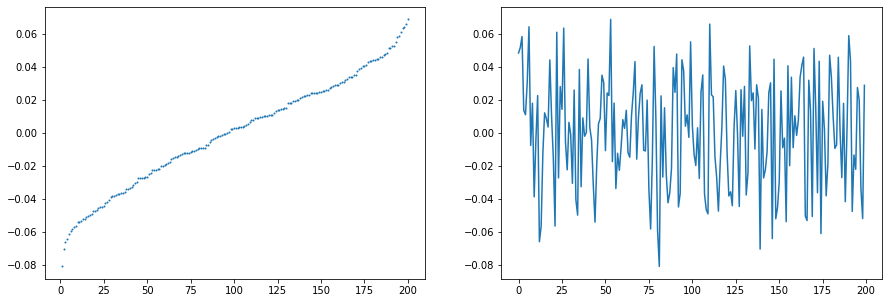

In [12]:
plt.figure(1, figsize=(15,5))
sorttogoal = corrtogoal.sort_values()
ax = plt.subplot(121)
ax.plot([i for i in range(1,201)], sorttogoal, 'o', markersize=1)
ax = plt.subplot(122)
ax.plot([i for i in range(corrtogoal.size)], corrtogoal)
plt.show()

No feature looks like it has a real linear correlation with the objective, and the correlation is generally more or less random across the dataset.

### Correlation between features

In [13]:
sortcor = correlations.iloc[1:201,1:201].abs().unstack().sort_values(kind="quicksort").reset_index()
sortcor = sortcor[sortcor['level_0'] < sortcor['level_1']]
print("\n The most correlated features are shown below:")
print(sortcor.tail(10))
print("\n The least correlated features are shown below:")
print(sortcor.head(10))


 The most correlated features are shown below:
       level_0  level_1         0
39781      112      185  0.013836
39782       69      171  0.013902
39784       51      138  0.014012
39786      128      140  0.014128
39788      120      165  0.014302
39791       51       99  0.014378
39792       36      136  0.014548
39795       91      151  0.014604
39796       36      148  0.014604
39798        4       17  0.014829

 The least correlated features are shown below:
    level_0  level_1             0
0        33       70  4.370327e-07
3        17       74  1.151774e-06
5       133      154  1.162002e-06
6        10       86  1.807790e-06
9        58       87  2.051344e-06
10       54      141  2.474324e-06
13      177      181  2.877344e-06
15       43       93  3.315843e-06
16       50      163  3.426349e-06
19        3      134  3.671988e-06


<Figure size 1152x1152 with 0 Axes>

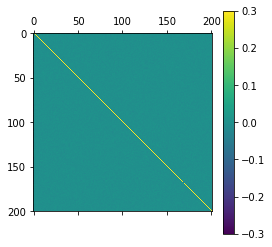

In [14]:
plt.figure(1, figsize=(16,16))
plt.matshow(correlations, vmin=-0.3, vmax=0.3)
plt.colorbar()
plt.show()

According to the standard of the literature, none of the features seem correlated.
#### No correlations have been highlighted

### Conclusion of EDA

The data set contains more negative samples than positive ones, we will need to address this. The features are not correlated and there seems to be few outliers. Some features also seems to have irregularities in their histogram, what may be exploitable if we find a way too.


# Data preprocessing

In this part we do some feature generation and try to address the imbalance in the data set.

In [15]:
#All dependencies necessary for the datapreprocessing

from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import imblearn
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import time
from sklearn.neighbors import KNeighborsClassifier

## Feature generation

Generating new features and adding them to the dataset. This will be a part of our model if it is included. it is therefore important to add the same features for each sample that we want to classify.

In [16]:
def makeFeatures(unFeaturedDataFrame): #Adds some features to the data
    df_featured = unFeaturedDataFrame.copy(deep=True)
    idx = features = df_featured.columns.values[2:]
    df_featured['sum'] = df_featured[idx].sum(axis=1)  
    df_featured['min'] = df_featured[idx].min(axis=1)
    df_featured['max'] = df_featured[idx].max(axis=1)
    df_featured['mean'] = df_featured[idx].mean(axis=1)
    df_featured['std'] = df_featured[idx].std(axis=1)
    df_featured['skew'] = df_featured[idx].skew(axis=1)
    df_featured['kurt'] = df_featured[idx].kurtosis(axis=1)
    df_featured['med'] = df_featured[idx].median(axis=1)
    return df_featured

In [17]:
train_df_featured = makeFeatures(train_df)
print(train_df.head())
print(train_df_featured.head())

       0    1        2       3        4       5        6       7       8    \
0  train_1    0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
1  train_2    0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
2  train_4    0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   
3  train_5    0  11.4763 -2.3182  12.6080  8.6264  10.9621  3.5609  4.5322   
4  train_6    0  11.8091 -0.0832   9.3494  4.2916  11.1355 -8.0198  6.1961   

       9    ...     192     193     194      195      196     197     198  \
0  16.5338  ...  7.6421  7.7214  2.5837  10.9516  15.4305  2.0339  8.1267   
1  14.6155  ...  2.9057  9.7905  1.6704   1.6858  21.6042  3.1417 -6.5213   
2  19.2514  ... -1.4905  9.5214 -0.1508   9.1942  13.2876 -1.5121  3.9267   
3  15.2255  ... -6.3068  6.6025  5.2912   0.4403  14.9452  1.0314 -3.6241   
4  12.0771  ...  8.7830  6.4521  3.5325   0.1777  18.3314  0.5845  9.1104   

      199      200     201  
0  8.7889  18.3560  1.9518  
1  8.2675 

The data is split into training and test data. We are careful to split the set before we do imbalance correction.

In [18]:
def splitTheData(df, num_training_samples=5000, num_total_samples=-1): #Splits the labeled data set into training and test sets
    # num_total_samples=-1 means that the remainder of the dataset will be taken in to the test set
    train_targets = df.iloc[1:num_training_samples,1]
    train_data = df.iloc[1:num_training_samples,2:]
    if ((num_total_samples <= num_training_samples) or (num_total_samples > df.shape[1])): 
        test_targets = df.iloc[num_training_samples:,1]
        test_data = df.iloc[num_training_samples:,2:]
    else:
        test_targets = df.iloc[num_training_samples:num_total_samples,1]
        test_data = df.iloc[num_training_samples:num_total_samples,2:]

    # Organise the data into numpy arrays so that it is handled correctly by imblearn
    nump_train_data = train_data.to_numpy()
    nump_train_data = nump_train_data.astype(float)
    nump_train_targets = train_targets.to_numpy()
    nump_train_targets = nump_train_targets.astype(int)
    
    nump_test_data = test_data.to_numpy()
    nump_test_data = nump_test_data.astype(float)
    nump_test_targets = test_targets.to_numpy()
    nump_test_targets = nump_test_targets.astype(int)
    
    return nump_train_data, nump_train_targets, nump_test_data, nump_test_targets
    

In [19]:
num_training_samples = 2000 # The number of samples to use in the training of the models, configureable to reduce strain on the computer
num_total_samples = 4000 # The number of samples in total, configureable to reduce strain on the computer
trainX, trainY, testX, testY = splitTheData(train_df, num_training_samples, num_total_samples)
trainX_featured, trainY_featured, testX_featured, testY_featured = splitTheData(train_df_featured, num_training_samples, num_total_samples)

### Comparison datasets with and without added features

We compare the datasets in XGBoost and k-nearest neighbors to see if the feature generation helps.

In [20]:
def auc2(model, Xtrain, ytrain, Xtest, ytest):
    trainPreds = model.predict(Xtrain)
    testPreds = model.predict(Xtest)
    trainAUC = roc_auc_score(ytrain ,trainPreds) 
    testAUC = roc_auc_score(ytest ,testPreds)
    return (trainAUC, testAUC)

def runKNN(Xtrain, ytrain, Xtest, ytest, technique): #KNN run on a given dataset and prints the results
    start = time.time()
    model = KNeighborsClassifier(n_neighbors=20)
    model.fit(Xtrain, ytrain)
    preds = model.predict_proba(Xtest)
    end = time.time()
    print("\nKNN run on " + technique)
    print("  -Training run time: %.4f seconds " % (end - start))
    start = time.time()
    trainAUC, testAUC = auc2(model, Xtrain, ytrain, Xtest, ytest)
    end = time.time()
    print("  -Prediction run time: %.4f seconds " % (end - start))
    print("  -AUC of training set prediction: %.4f%%" % (trainAUC * 100))
    print("  -AUC of test set prediction: %.4f%%" % (testAUC * 100))

def runXGB(Xtrain, ytrain, Xtest, ytest, technique, param): #Runs XGBoost on a given dataset and prints the results
    dtrain = xgb.DMatrix(Xtrain, label=ytrain)
    dtest = xgb.DMatrix(Xtest, label=ytest)

    start = time.time()

    model = xgb.train(param, dtrain, num_round)

    end = time.time()
    print("\nXGBoost run on " + technique)
    print("  -Training run time: %.4f seconds " % (end - start))
    
    start = time.time()
    trainAUC, testAUC = auc2(model, dtrain, ytrain, dtest, ytest)
    end = time.time()
    print("  -Prediction run time: %.4f seconds " % (end - start))
    print("  -AUC of training set prediction: %.4f%%" % (trainAUC * 100))
    print("  -AUC of test set prediction: %.4f%%" % (testAUC * 100))

In [21]:
param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic', 'eval_metric':'auc'}
num_round = 200

runXGB(trainX, trainY, testX, testY,'dataset without added features.', param)
runXGB(trainX_featured, trainY_featured, testX_featured, testY_featured,'dataset WITH added features.', param)

runKNN(trainX, trainY, testX, testY,'dataset without added features.')
runKNN(trainX_featured, trainY_featured, testX_featured, testY_featured,'dataset WITH added features.')


XGBoost run on dataset without added features.
  -Training run time: 1.3463 seconds 
  -Prediction run time: 0.1406 seconds 
  -AUC of training set prediction: 100.0000%
  -AUC of test set prediction: 74.0392%

XGBoost run on dataset WITH added features.
  -Training run time: 1.3643 seconds 
  -Prediction run time: 0.1436 seconds 
  -AUC of training set prediction: 100.0000%
  -AUC of test set prediction: 74.9810%

KNN run on dataset without added features.
  -Training run time: 75.4263 seconds 
  -Prediction run time: 79.9931 seconds 
  -AUC of training set prediction: 50.0000%
  -AUC of test set prediction: 50.0000%

KNN run on dataset WITH added features.
  -Training run time: 57.6498 seconds 
  -Prediction run time: 59.3890 seconds 
  -AUC of training set prediction: 50.0000%
  -AUC of test set prediction: 50.0000%


### Feature generation conclusion

The added features are not increasing the prediction rate very much. They do not affect overfitting to a great extent either. The difference between the AUC of the predictions from the training data compared to the test data is an indicator the degree of overfitting.

A side note is that KNN is evidently a terrible technique to use for this data.

## Data set balancing
Due to the imbalanced dataset, we try balance it using SMOTE, random oversampling, and tomek links in combination with random undersampling.

In [22]:
def testBalancing(X,y):#Applies various balancing techniques
    #Tomek links
    tl = imblearn.under_sampling.TomekLinks(return_indices=True, ratio='majority')
    X_tl, y_tl, id_tl = tl.fit_sample(X, y)

    #Random undersampling
    rus = imblearn.under_sampling.RandomUnderSampler(sampling_strategy='auto',return_indices=True)
    X_rus, y_rus, id_rus = rus.fit_sample(X_tl, y_tl)

    #Random oversampling
    ros = imblearn.over_sampling.RandomOverSampler()
    X_ros, y_ros = ros.fit_sample(X, y)

    #SMOTE
    smote = SMOTE(ratio='minority',  k_neighbors=40)
    X_sm, y_sm = smote.fit_sample(X, y)
    
    return X_tl, y_tl, X_rus, y_rus, X_ros, y_ros, X_sm, y_sm
    

In [23]:
X_tl, y_tl, X_rus, y_rus, X_ros, y_ros, X_sm, y_sm = testBalancing(trainX,trainY)

### Comparison of balancing techniques

We compare SMOTE, random oversampling, tomek links in combination with random undersampling, and the original dataset in both XGBoost and KNN.

In [24]:
runKNN(X_sm, y_sm, testX, testY, 'data set balanced using SMOTE.')
runKNN(X_rus, y_rus, testX, testY, 'data set balanced using tomek, followed by random undersampling.')
runKNN(X_ros, y_ros, testX, testY, 'data set balanced using random oversampling.')
runKNN(trainX, trainY, testX, testY, 'data set without any balancing operations applied.')


KNN run on data set balanced using SMOTE.
  -Training run time: 122.5343 seconds 
  -Prediction run time: 130.5080 seconds 
  -AUC of training set prediction: 50.0554%
  -AUC of test set prediction: 50.0130%

KNN run on data set balanced using tomek, followed by random undersampling.
  -Training run time: 11.7466 seconds 
  -Prediction run time: 13.8939 seconds 
  -AUC of training set prediction: 60.2564%
  -AUC of test set prediction: 55.1771%

KNN run on data set balanced using random oversampling.
  -Training run time: 124.3652 seconds 
  -Prediction run time: 130.0891 seconds 
  -AUC of training set prediction: 75.1386%
  -AUC of test set prediction: 52.9539%

KNN run on data set without any balancing operations applied.
  -Training run time: 75.4436 seconds 
  -Prediction run time: 79.7807 seconds 
  -AUC of training set prediction: 50.0000%
  -AUC of test set prediction: 50.0000%


In [25]:
runXGB(X_sm, y_sm, testX, testY, 'data set balanced using SMOTE.', param)
runXGB(X_rus, y_rus, testX, testY, 'data set balanced using tomek, followed by random undersampling.', param)
runXGB(X_ros, y_ros, testX, testY, 'data set balanced using random oversampling.', param)
runXGB(trainX, trainY, testX, testY, 'data set without any balancing operations applied.', param)


XGBoost run on data set balanced using SMOTE.
  -Training run time: 2.6499 seconds 
  -Prediction run time: 0.1456 seconds 
  -AUC of training set prediction: 100.0000%
  -AUC of test set prediction: 67.3742%

XGBoost run on data set balanced using tomek, followed by random undersampling.
  -Training run time: 0.3371 seconds 
  -Prediction run time: 0.1167 seconds 
  -AUC of training set prediction: 100.0000%
  -AUC of test set prediction: 68.9168%

XGBoost run on data set balanced using random oversampling.
  -Training run time: 2.0126 seconds 
  -Prediction run time: 0.1945 seconds 
  -AUC of training set prediction: 100.0000%
  -AUC of test set prediction: 72.8320%

XGBoost run on data set without any balancing operations applied.
  -Training run time: 1.4281 seconds 
  -Prediction run time: 0.1426 seconds 
  -AUC of training set prediction: 100.0000%
  -AUC of test set prediction: 74.0392%


### Balancing techniques conclusion

XGBoost has the AUC as its evaluation metric and shouldn't be very affected by the imbalance in the dataset, this looks to be the case. The effect was small with the exception of SMOTE, which reduced the accuracy of the model. The artifical samples generated by SMOTE appears to have worsened the data set and reduced the usefullness of the set.

KNN is a poor predictor for this dataset, but was chosen because of its sensitivity to imbalanced data. We can see that the tomek improved the results from KNN, while the other techniques didn't affect it much. The random oversampling increased overfitting drastically.